# 统计标签数量和状态

In [14]:
import os
import matplotlib.pyplot as plt

def count_tag_file(path):
    ''' 
    @description: 统计文件中的各种类tag数量
    @param path {string} 文件路径
    @return {dict} tag数量
    '''

    tag_dict = {}
    for file in os.listdir(path):
        with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
            if file == '.DS_Store':
                continue
            start = False
            for line in f.readlines():
                if line == '#start\n':
                    start = True
                if line.find('#end') != -1:
                    break
                if not start:
                    continue

                tag = line.strip()
                tag = tag.split('-')[0]
                if tag in tag_dict:
                    tag_dict[tag] += 1
                else:
                    tag_dict[tag] = 1

    return tag_dict

mhp_path = os.path.join('Record Collections MFP', 'Imported Medical Record')
mzy_path = os.path.join('Record Collections MZY', 'Import Medical Record')
xjb_path = os.path.join('Record Collections', 'Import Medical Record')

mhp_tag_dict = count_tag_file(mhp_path)
mzy_tag_dict = count_tag_file(mzy_path)
xjb_tag_dict = count_tag_file(xjb_path)

# for key in mhp_tag_dict:
#     print('{} : {}'.format(key, mhp_tag_dict[key]))
print(' disease : {} '.format(mhp_tag_dict['disease']))
print('dia : {} disease : {} cure : {}'.format(mzy_tag_dict['dia'], mzy_tag_dict['disease'], mzy_tag_dict['cure']))
print('dia : {} disease : {} cure : {}'.format(xjb_tag_dict['dia'], xjb_tag_dict['disease'], xjb_tag_dict['cure']))

 disease : 240 
dia : 908 disease : 549 cure : 768
dia : 400 disease : 313 cure : 511


In [20]:
dia_cnt = mzy_tag_dict['dia'] + xjb_tag_dict['dia']
disease_cnt = mhp_tag_dict['disease'] + mzy_tag_dict['disease'] + xjb_tag_dict['disease']
cure_cnt = mzy_tag_dict['cure'] + xjb_tag_dict['cure']

dia_cnt_mzy = mzy_tag_dict['dia']
dia_cnt_xjb = xjb_tag_dict['dia']
dia_cnt_mhp = 0
disease_cnt_mzy = mzy_tag_dict['disease']
disease_cnt_xjb = xjb_tag_dict['disease']
disease_cnt_mhp = mhp_tag_dict['disease']
cure_cnt_mzy = mzy_tag_dict['cure']
cure_cnt_xjb = xjb_tag_dict['cure']
cure_cnt_mhp = 0

print('dia : {} disease : {} cure : {}'.format(dia_cnt, disease_cnt, cure_cnt))

dia : 1308 disease : 1102 cure : 1279


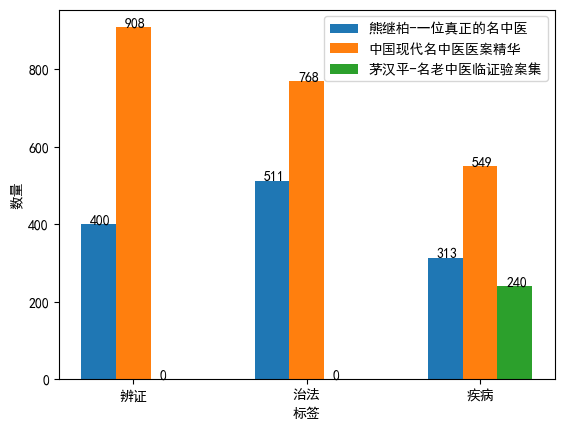

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定使用SimHei字体

# 数据
categories = ['辨证', '治法', '疾病']  # x轴分类
x = np.arange(len(categories))  # x轴位置
width = 0.2  # 柱状图宽度

# 数据集1
data1 = [dia_cnt_xjb, cure_cnt_xjb, disease_cnt_xjb]
plt.bar(x - width, data1, width, label='熊继柏-一位真正的名中医')
for i, v in enumerate(data1):
    plt.text(x[i] - 0.05 - width, v + 0.5, str(v), color='black')

# 数据集2
data2 = [dia_cnt_mzy, cure_cnt_mzy, disease_cnt_mzy]
plt.bar(x , data2, width, label='中国现代名中医医案精华')
for i, v in enumerate(data2):
    plt.text(x[i] - 0.05 , v + 0.5, str(v), color='black')

data3 = [dia_cnt_mhp, cure_cnt_mhp, disease_cnt_mhp]
plt.bar(x + width, data3, width, label='茅汉平-名老中医临证验案集')
for i, v in enumerate(data3):
    plt.text(x[i] - 0.05 + width, v + 0.5, str(v), color='black')

# 设置x轴标签和图例
plt.xlabel('标签')
plt.ylabel('数量')
plt.xticks(x, categories)
plt.legend()

# 显示图形
plt.show()